# A FeedForward Deep Neural Network on the FashionMnist Dataset

> This notebook is one of the contributions made to the MODECI-MDF project for Outreachy Internship Contribution Phase (_Summer_, 2023) . The aim of creating this notebook is to build a model using [Keras](https://keras.io) API and convert the model to MDF model using a slightly modified version (by me) of the **`keras2mdf`** python script in development by MODECI

## Dataset

The fashion-mnist dataset contains 60,000 images for training and 10,000 images for testing. The images have ten classes which are; T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.

## Get Data

In [1]:
# import the fashion_mnist from keras datasets
import keras.datasets.fashion_mnist as fashion_mnist

# retrieve the training and validation data
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

# remove the first image array from the validation data and assign it as test data
x_test, x_val = x_val[0, :, :], x_val[1:, :, :]
y_val = y_val[1:]

# map each label class to its name
label_map = {0 : "T-shirt/top", 
             1 : "Trouser", 
             2 : "Pullover", 
             3 : "Dress", 
             4 : "Coat",
             5 : "Sandal",
             6 : "Shirt",
             7 : "Sneaker",
             8 : "Bag",
             9 : "Ankle boot"
            }

In [2]:
# check the input shape for all the training, validation, and testing images
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_val is: {x_val.shape}")
print(f"The shape of x_test is: {x_test.shape}")

The shape of x_train is: (60000, 28, 28)
The shape of x_val is: (9999, 28, 28)
The shape of x_test is: (28, 28)


In [3]:
# check the label shape for all the training, and validation images
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_val is: {y_val.shape}")

The shape of y_train is: (60000,)
The shape of y_val is: (9999,)


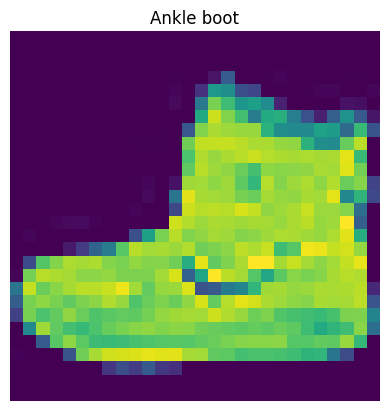

In [4]:
# import python library to visualization image
import matplotlib.pyplot as plt

# check the first image in the Fashion-Mnist data
img_arr  = x_train[0, :, :]
label_id = y_train[0]
plt.axis('off')
plt.title(f"{label_map[label_id]}")
plt.imshow(img_arr);

## Data Preprocessing

In [5]:
# import module for preprocessing the data
import keras.utils as utils

In [6]:
# transfrom the input images by rescaling the pixel values to 0-1
x_train_scaled = x_train/255
x_val_scaled = x_val/255
x_test_scaled = x_test/255

# do one-hot encoding to reshape the label
y_train_encoding = utils.to_categorical(y_train)
y_val_encoding = utils.to_categorical(y_val)

## Keras Model

In [7]:
# import classes and function needed for modelling
from keras.layers import Flatten, Dense
from keras.models import Sequential, load_model
from keras.utils.vis_utils import plot_model

### Building

In [8]:
# create the keras model with a feedforward neural architecture
kr_model = Sequential([
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# compile the model
kr_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

### Training

In [9]:
# train the model 
history = kr_model.fit(x_train_scaled, 
                       y_train_encoding, 
                       validation_data=(x_val_scaled, y_val_encoding), 
                       batch_size=10, 
                       epochs=4, 
                       verbose=2)

Epoch 1/4
6000/6000 - 25s - loss: 0.4707 - accuracy: 0.8298 - val_loss: 0.4616 - val_accuracy: 0.8359 - 25s/epoch - 4ms/step
Epoch 2/4
6000/6000 - 24s - loss: 0.3608 - accuracy: 0.8683 - val_loss: 0.3856 - val_accuracy: 0.8600 - 24s/epoch - 4ms/step
Epoch 3/4
6000/6000 - 23s - loss: 0.3273 - accuracy: 0.8807 - val_loss: 0.3564 - val_accuracy: 0.8718 - 23s/epoch - 4ms/step
Epoch 4/4
6000/6000 - 24s - loss: 0.3031 - accuracy: 0.8878 - val_loss: 0.3584 - val_accuracy: 0.8743 - 24s/epoch - 4ms/step


### Evaluation

In [10]:
# evaluate how well the model does on training images
kr_model.evaluate(x_train_scaled, y_train_encoding)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2779 - accuracy: 0.8962


[0.27786991000175476, 0.8962166905403137]

In [11]:
# evaluate how well the model does on the validation images
kr_model.evaluate(x_val_scaled, y_val_encoding)

313/313 [==============================] - 1s 3ms/step - loss: 0.3584 - accuracy: 0.8743


[0.358370840549469, 0.8742874264717102]

### Visualize the model

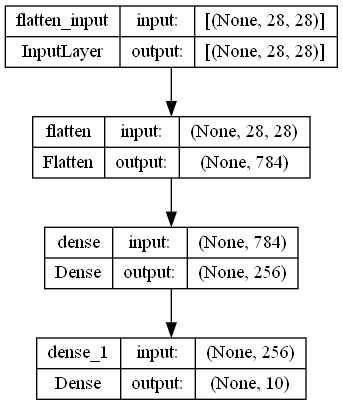

In [12]:
# plot the keras model
plot_model(kr_model, to_file="kr_feed_forward_model.png", show_shapes=True)

### Predict on test image

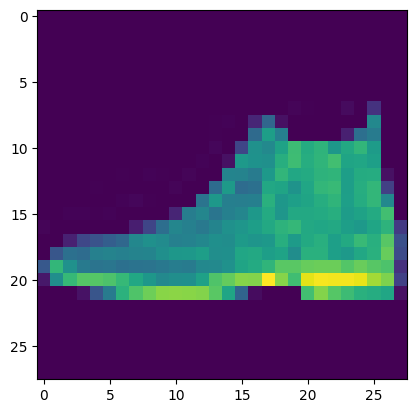

In [13]:
# visualize the test image
plt.imshow(x_test_scaled);

In [14]:
# reshape the test image dimension
x_test_scaled = x_test_scaled.reshape(1, 28, 28)

In [15]:
# predict the class of the test image using the keras model
pred = kr_model.predict(x_test_scaled, batch_size=1)

# check prediction probabilities
print(f"Prediction: \n{pred}")

# get highest prediction probability
label_ind = pred.argmax()

# label of prediction
label_map[label_ind]

1/1 [==============================] - 0s 197ms/step
Prediction: 
[[5.7691852e-07 7.2739310e-12 1.2232545e-09 1.3249107e-09 1.4535550e-08
  1.8108208e-02 7.3135674e-08 2.7836841e-02 3.9151928e-08 9.5405424e-01]]


'Ankle boot'

## MDF Model

### Retrieve details from Keras model needed to build MDF model

In [16]:
# get layers in the keras model
kr_model_layers = []
for layer in kr_model.layers:
    kr_model_layers.append(layer.name)
    
# see layers in the keras model
print(kr_model_layers)

['flatten', 'dense', 'dense_1']


In [17]:
# import sys to temporarily add files to sys path 
import sys

# add dir path of the keras2mdf helper function
sys.path.append("C:\\Users\\peaceOiza\\Documents\\MDF\\examples\\TensorFlow\\Keras")

# access every function in keras2mdf
from keras2mdf import *

In [18]:
# get the parameters and activation in each dense layer
# use the get_weights_and_activation function from keras2mdf
params, activations = get_weights_and_activation(kr_model_layers[1:], kr_model)

### Build MDF model

In [19]:
# create mdf model and graph using the init_model_with_graph function from keras2mdf
mdf_model, mdf_model_graph = init_model_with_graph("feedforward", "feedforward_graph")

In [20]:
# check the input shape of the first dense layer of keras model 
kr_model.layers[1].input_shape

(None, 784)

#### Create input node for the model

In [21]:
# reshape x_test_scaled from (1, 28, 28) to (1, 784)
input_value = x_test_scaled.reshape(784,)

# create the input node for the mdf model
input_node = create_input_node("input_node", input_value)

# add the input node to the mdf model graph

mdf_model_graph.nodes.append(input_node)

#### Create function to view each node structure in the model as a dictionary

In [22]:
# define function to access nodes using dictionary structure
def access_nodes(node_name, graph=mdf_model_graph):
    # convert the graph structure to dict
    mdf_dict = mdf_model_graph.to_dict()

    # access all the nodes in mdf_dict
    nested_nodes_dict = mdf_dict["feedforward_graph"]["nodes"]
    
    # return details about a specific node 
    return nested_nodes_dict[node_name]

In [23]:
# uncomment code below to see info on input node
# print("The details about the input node in the model are: ")
# print("="*50)
# access_nodes("input_node")

#### Create first Dense node of the model

In [24]:
# get weights and bias for the first dense node
weights_h1 = params["dense"]["weights"]
bias_h1 = params["dense"]["bias"]

# create the first dense node for the mdf model
dense_node = create_dense_node("dense_node", weights_h1, bias_h1)

# add the dense node to the mdf model graph
mdf_model_graph.nodes.append(dense_node)

In [25]:
# uncomment code below to see info on the first dense node
# print("The details about the first dense node in the model are: ")
# print("="*50)
# access_nodes("dense_node")

#### Create first activation node 

In [26]:
# create activation on first dense node
activation_node = create_activation_node("activation_node", activations[0])

# add the activation of the first dense node to the mdf model graph
mdf_model_graph.nodes.append(activation_node)

In [27]:
# uncomment code below to see info on the activation of the first dense node
# print("The details about the activation for the first dense layer in the model are: ")
# print("="*50)
# access_nodes("activation_node")

#### Create second Dense node of the model

In [28]:
# get weights and bias for the second dense node
weights_h2 = params["dense_1"]["weights"]
bias_h2 = params["dense_1"]["bias"]

# create the second dense node for the mdf model
dense_node_1 = create_dense_node("dense_node_1", weights_h2, bias_h2)

# add the second dense node to the mdf model graph
mdf_model_graph.nodes.append(dense_node_1)

In [29]:
# uncomment code below to see info on the second dense node
# print("The details about the first dense node in the model are: ")
# print("="*50)
# access_nodes("dense_node_1")

#### Create output node

In [30]:
# create activation on second dense node to get the model's output
output_node = create_activation_node("output_node", activations[1])

# add the activation of the first dense node to the mdf model graph
mdf_model_graph.nodes.append(output_node)

In [31]:
# uncomment code below to see info on the activation of the second dense node
# print("The details about the activation for the second dense layer in the model are: ")
# print("="*50)
# access_nodes("output_node")

#### Create connections between the nodes in the model

In [32]:
# import function to create links between a sender node to a receiver node
# the sender node sends its output as input for the receiver node
from modeci_mdf.utils import simple_connect
e1 = simple_connect(input_node, dense_node, mdf_model_graph)
e2 = simple_connect(dense_node, activation_node, mdf_model_graph)
e3 = simple_connect(activation_node, dense_node_1, mdf_model_graph)
e4 = simple_connect(dense_node_1, output_node, mdf_model_graph)

#### Generate graph image of the model

Converting MDF graph: feedforward_graph to graphviz (level: 1, format: png)
    Node: input_node
Bkgd color: None (#444444), font: black
    Node: dense_node
Bkgd color: None (#444444), font: black
    Node: activation_node
Bkgd color: None (#444444), font: black
    Node: dense_node_1
Bkgd color: None (#444444), font: black
    Node: output_node
Bkgd color: None (#444444), font: black
    Edge: edge_input_node_dense_node connects input_node to dense_node
    Edge: edge_dense_node_activation_node connects dense_node to activation_node
    Edge: edge_activation_node_dense_node_1 connects activation_node to dense_node_1
    Edge: edge_dense_node_1_output_node connects dense_node_1 to output_node
Written graph image to: keras_to_MDF.png


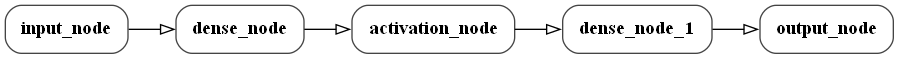

In [33]:
mdf_model.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=1,
        filename_root="keras_to_MDF",
        is_horizontal=True,
        solid_color=True
)
from IPython.display import Image
Image(filename="Keras_to_MDF.png")

#### Evaluate the model

In [34]:
from modeci_mdf.execution_engine import EvaluableGraph

# create an instance of EvaluableGraph on the graph
eg = EvaluableGraph(mdf_model_graph, verbose=False)
eg.evaluate()


Init graph: feedforward_graph
Evaluating graph: feedforward_graph, root nodes: ['input_node'], with array format numpy


In [35]:
# check prediction probabilities of mdf model
mdf_pred = eg.enodes['output_node'].evaluable_outputs['output_node_out'].curr_value
print(f"Mdf model prediction probabilities:\n{mdf_pred}")

# get highest prediction probability
class_ind = mdf_pred.argmax()

# label of prediction
label_map[class_ind]

Mdf model prediction probabilities:
[5.76918746e-07 7.27391711e-12 1.22325709e-09 1.32491323e-09
 1.45355776e-08 1.81082021e-02 7.31356273e-08 2.78368284e-02
 3.91518841e-08 9.54054263e-01]


'Ankle boot'

In [36]:
# compare keras model and mdf model prediction probabilities
assert pred.all() == mdf_pred.all()